<h4>Thesis</h4>
<h6>These models try predict if the score of the home team(principal) is larger than the visitor team, utilizing KNN. <br>The variables X are: "home_odds", "draw_odds", "away_odds"<br>
The variables Y are: "back_away"</h6>

<h6>When the quantity of the score of the visitor team is larger than the home team(principal) then assign 1 to the field "back_away". When the quantity of the score of the visitor team is minus than of the home team(principal) then assign 0 to field "back_away".</h6>

<h6>*The secret to increase the hit rate is to choose good variables. The better the variables the higher the hit rate will be.*</h6>

<h5>Import dataset</h5>
<h6>Importing the dataset from file .csv.</h6>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings

pd.set_option("display.min_rows", 200)
pd.set_option("display.max_rows", 600)
pd.set_option("display.max_columns", 100)

# Premier League - England
premier_league_2016_2017 = pd.read_csv("https://www.football-data.co.uk/mmz4281/1617/E0.csv")
premier_league_2017_2018 = pd.read_csv("https://www.football-data.co.uk/mmz4281/1718/E0.csv")
premier_league_2018_2019 = pd.read_csv("https://www.football-data.co.uk/mmz4281/1819/E0.csv")
premier_league_2019_2020 = pd.read_csv("https://www.football-data.co.uk/mmz4281/1920/E0.csv")
premier_league_2020_2021 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2021/E0.csv")
premier_league_2021_2022 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2122/E0.csv")
premier_league_2022_2023 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2223/E0.csv")

df = pd.concat([premier_league_2016_2017, premier_league_2017_2018, premier_league_2018_2019, premier_league_2019_2020, premier_league_2020_2021, premier_league_2021_2022, premier_league_2022_2023], axis=0, ignore_index=True)
#df = pd.concat([premier_league_2021_2022, premier_league_2022_2023], axis=0, ignore_index=True)
df["League"] = "Premier League"
df = df[["League", "Date", "HomeTeam", "AwayTeam", "B365H", "B365D", "B365A", "FTHG", "FTAG"]]
df.columns = ["league", "date", "home", "away", "home_odds", "draw_odds", "away_odds", "home_goals_ft", "away_goals_ft"]
df = df.astype({"date":"datetime64"})
df.dropna(inplace=True)
df = df.convert_dtypes(infer_objects=True)
df.reset_index(inplace=True, drop=True)
df.tail()

,league,date,home,away,home_odds,draw_odds,away_odds,home_goals_ft,away_goals_ft
2506,Premier League,2023-02-18,Nott'm Forest,Man City,8.50,5.50,1.30,1,1
2507,Premier League,2023-02-18,Wolves,Bournemouth,1.67,3.60,6.00,0,1
2508,Premier League,2023-02-18,Newcastle,Liverpool,2.50,3.50,2.70,0,2
2509,Premier League,2023-02-19,Man United,Leicester,1.62,4.33,5.25,3,0
2510,Premier League,2023-02-19,Tottenham,West Ham,1.75,3.60,4.75,2,0


<h5>Feature Engineering and Preprocessing</h5>
<h6>When the quantity of the score of the home team(principal) is larger than the visitor team then assign 0 to the field "lay_home". When the quantity of the score of the visitor team is minus than of the home team(principal) then assign 1 to field "lay_home".</h6>

In [34]:
df.loc[(df["home_goals_ft"] < df["away_goals_ft"]), "back_away"] = 1
df.loc[(df["home_goals_ft"] >= df["away_goals_ft"]), "back_away"] = 0
df.head()

,league,date,home,away,home_odds,draw_odds,away_odds,home_goals_ft,away_goals_ft,back_away
2506,Premier League,2023-02-18,Nott'm Forest,Man City,8.50,5.50,1.30,1,1,0.0
2507,Premier League,2023-02-18,Wolves,Bournemouth,1.67,3.60,6.00,0,1,1.0
2508,Premier League,2023-02-18,Newcastle,Liverpool,2.50,3.50,2.70,0,2,1.0
2509,Premier League,2023-02-19,Man United,Leicester,1.62,4.33,5.25,3,0,0.0
2510,Premier League,2023-02-19,Tottenham,West Ham,1.75,3.60,4.75,2,0,0.0


<h5>Defining X and Y</h5>

In [35]:
X = df.loc[:, ["home_odds", "draw_odds", "away_odds"]]
y = df.loc[:, "back_away"]

<h5>Pre processing (Standard Scaler)</h5>

In [36]:
std = StandardScaler()
X = std.fit_transform(X)

<h5>Split Train and Test</h5>

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X)

(1883, 3) (628, 3) (1883,) (628,)
[[-0.26958056 -0.66173725 -0.36323789]
 [-0.4338339  -0.66173725 -0.09386176]
 [ 0.05892613 -0.59581504 -0.54641366]
 ...
 [-0.22851722 -0.52989282 -0.48176339]
 [-0.58987458  0.01726159  0.06776392]
 [-0.53649224 -0.4639706  -0.03998653]]


<h5>Train the Model</h5>

In [38]:
knn = KNeighborsClassifier(n_neighbors=3, metric="minkowski", p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

<h5>Evaluate the Model</h5>

In [39]:
y_predictions = knn.predict(X_test)

print(f"Accuracy score (training): {knn.score(X_train, y_train)}")
print(f"Accuracy score (validation): {knn.score(X_test, y_test)}\n")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_predictions)}\n")
print(f"Classification Report:\n {classification_report(y_test, y_predictions)}")

Accuracy score (training): 0.8008497079129049
Accuracy score (validation): 0.6640127388535032

Confusion Matrix:
 [[334  90]
 [121  83]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.79      0.76       424
         1.0       0.48      0.41      0.44       204

    accuracy                           0.66       628
   macro avg       0.61      0.60      0.60       628
weighted avg       0.65      0.66      0.66       628



<h5>Informations about model</h5>

In [40]:
print(f"Games that was predicted as been 0 and was 0: {confusion_matrix(y_test, y_predictions)[0][0]}")
print(f"Games that was predicted as been 0 and was 1: {confusion_matrix(y_test, y_predictions)[1][0]}")
print(f"Games that was predicted as been 1 and was 0: {confusion_matrix(y_test, y_predictions)[0][1]}")
print(f"Games that was predicted as been 1 and was 1: {confusion_matrix(y_test, y_predictions)[1][1]}")

test_total_matches = confusion_matrix(y_test, y_predictions)[0][0] + \
                     confusion_matrix(y_test, y_predictions)[0][1] + \
                     confusion_matrix(y_test, y_predictions)[1][0] + \
                     confusion_matrix(y_test, y_predictions)[1][1]

entry_games = confusion_matrix(y_test, y_predictions)[0][1] + confusion_matrix(y_test, y_predictions)[1][1]
entry_tax = (entry_games / test_total_matches) * 100
hit_rate = (confusion_matrix(y_test, y_predictions)[1][1] / entry_games) * 100

print(f"Total Matches: {test_total_matches}")
print(f"Entry Games: {entry_games}")
print(f"Entry Tax: {entry_tax.round(2)}%")
print(f"Hit Rate: {hit_rate.round(2)}%")

Games that was predicted as been 0 and was 0: 334
Games that was predicted as been 0 and was 1: 121
Games that was predicted as been 1 and was 0: 90
Games that was predicted as been 1 and was 1: 83
Total Matches: 628
Entry Games: 173
Entry Tax: 27.55%
Hit Rate: 47.98%


<h5>Backtest</h5>

In [41]:
stake = 1
win_back = stake * (df["away_odds"] - 1)
lose_back = -stake

df["predictions"] = knn.predict(X)
df.loc[(df["predictions"] == 1) & (df["back_away"] == 1), "profit"] = win_back
df.loc[(df["predictions"] == 1) & (df["back_away"] == 0), "profit"] = lose_back
df.loc[(df["predictions"] == 0) & (df["back_away"] == 1), "profit"] = 0
df.loc[(df["predictions"] == 0) & (df["back_away"] == 0), "profit"] = 0

df = df[df["predictions"] == 1]
df["profit_accumulated"] = df["profit"].cumsum()
df.tail(10)

,league,date,home,away,home_odds,draw_odds,away_odds,home_goals_ft,away_goals_ft,back_away,predictions,profit,profit_accumulated
2495,Premier League,2023-11-02,Southampton,Wolves,2.90,3.20,2.55,1,2,1.0,1.0,1.55,311.06
2496,Premier League,2023-11-02,Bournemouth,Newcastle,6.50,4.00,1.53,1,1,0.0,1.0,-1.00,310.06
2497,Premier League,2023-12-02,Leeds,Man United,3.75,3.80,1.91,0,2,1.0,1.0,0.91,310.97
2500,Premier League,2023-02-15,Arsenal,Man City,2.90,3.50,2.35,1,3,1.0,1.0,1.35,312.32
2503,Premier League,2023-02-18,Brighton,Fulham,1.65,3.80,5.50,0,1,1.0,1.0,4.50,316.82
2504,Premier League,2023-02-18,Chelsea,Southampton,1.40,4.75,8.50,0,1,1.0,1.0,7.50,324.32
2505,Premier League,2023-02-18,Everton,Leeds,2.40,3.30,3.00,1,0,0.0,1.0,-1.00,323.32
2506,Premier League,2023-02-18,Nott'm Forest,Man City,8.50,5.50,1.30,1,1,0.0,1.0,-1.00,322.32
2508,Premier League,2023-02-18,Newcastle,Liverpool,2.50,3.50,2.70,0,2,1.0,1.0,1.70,324.02
2509,Premier League,2023-02-19,Man United,Leicester,1.62,4.33,5.25,3,0,0.0,1.0,-1.00,323.02


<h5>Plot Backtest</h5>

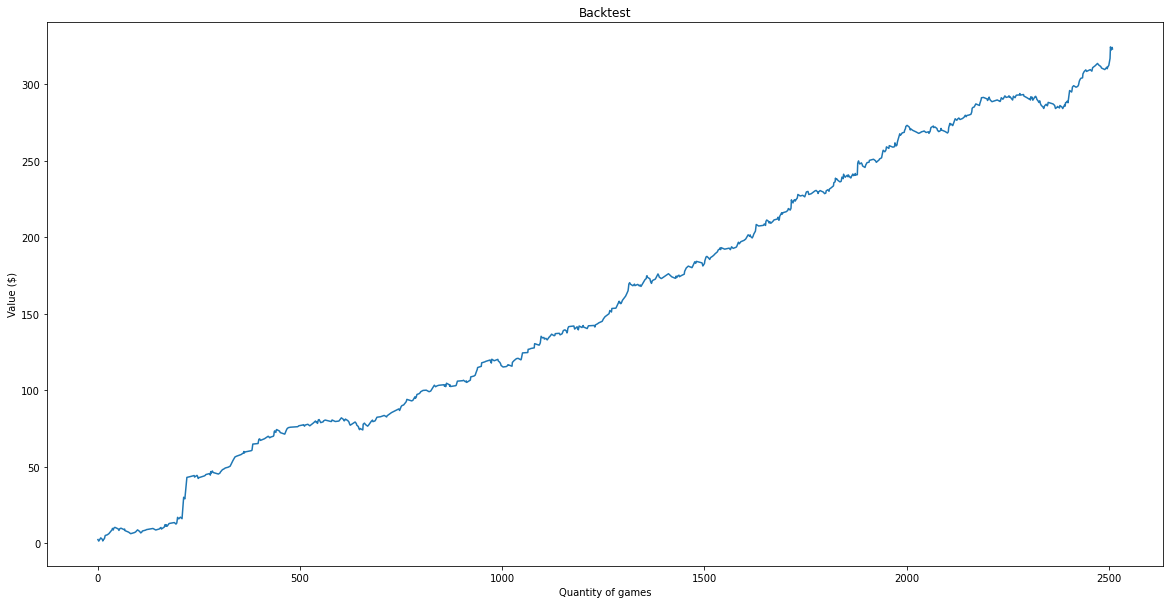

In [42]:
plt.figure(figsize=(20, 10))
plt.plot(df["profit_accumulated"])
plt.xlabel("Quantity of games")
plt.ylabel("Value ($)")
plt.title("Backtest")
plt.show()

<h5>ROI (Return on Investment)</h5>

In [43]:
roi = (df["profit_accumulated"].tail(1)/ len(df)) * 100
print(f"ROI: {roi.values}")

ROI: [44.6160221]
